In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing csv into the notebook
df = pd.read_csv("data.csv",encoding ="ISO-8859-1")

In [18]:
print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [13]:
# to check the last 5 rows
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [14]:
# to check the rows and columns
df.shape

(541909, 8)

In [15]:
# to check the data-types and nulls
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [17]:
# to check the summary stats
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [20]:
# to check the missing values per column
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [21]:
# to check for duplicates
df.duplicated().sum()

5268

In [23]:
# to check for unique invoices 
df['InvoiceNo'].nunique()

25900

In [24]:
# to check for unique products
df['StockCode'].nunique()

4070

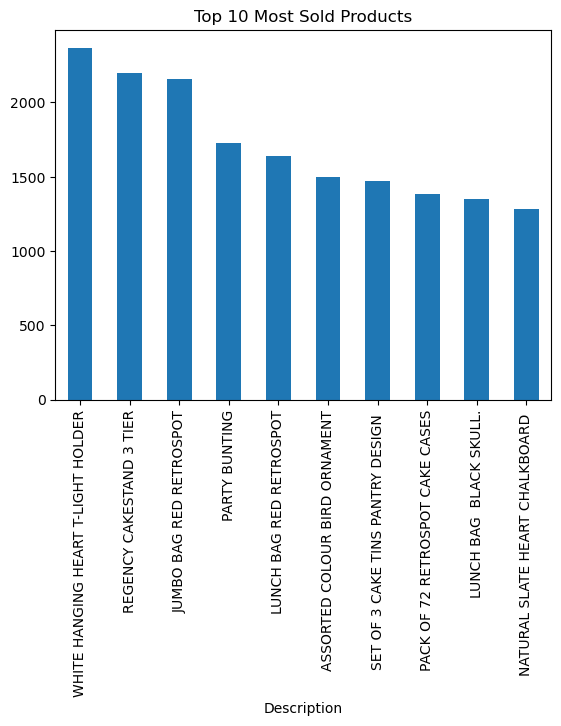

In [25]:
# Top 10 products
df['Description'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Most Sold Products")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


(-50.0, 100.0)

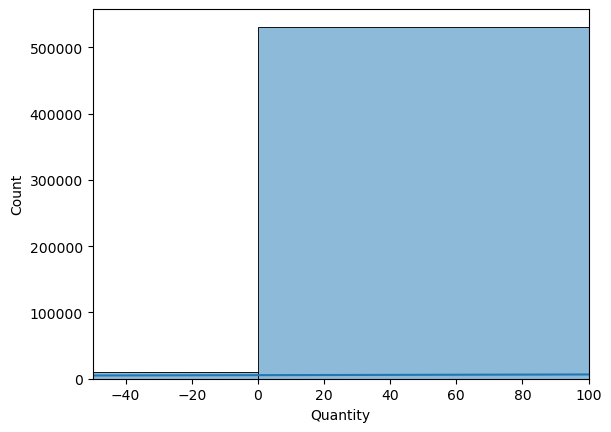

In [27]:
# Distribution of quantity
sns.histplot(df['Quantity'], bins=50,kde=True)
plt.xlim(-50,100) # remove extreme outliers for clarity

Text(0.5, 1.0, 'Top Countries by Revenue')

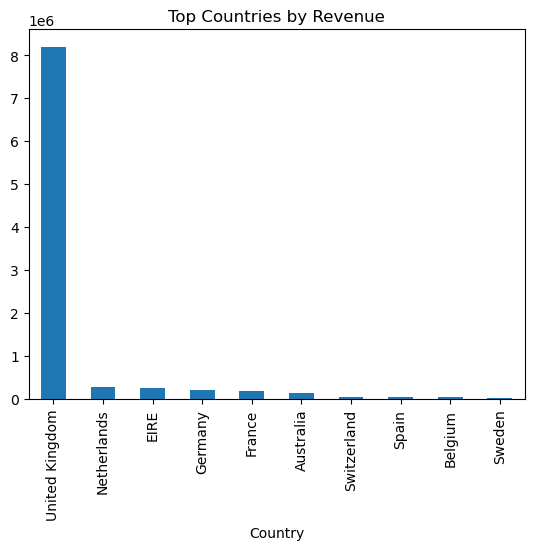

In [37]:
# Revenue Per Country
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
country_revenue = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending = False)
country_revenue.head(10).plot(kind='bar')
plt.title("Top Countries by Revenue")

(0.0, 100.0)

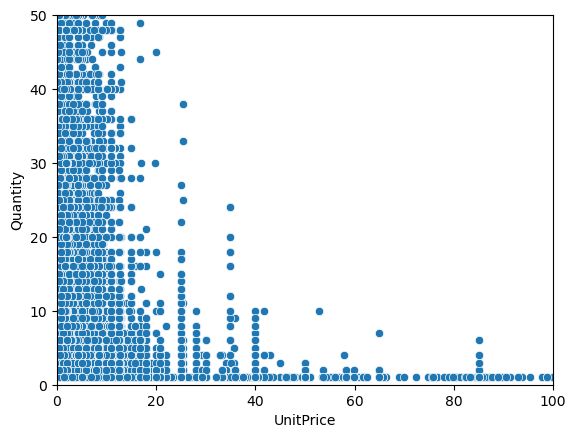

In [38]:
# Quantity v/s Price
sns.scatterplot(x='UnitPrice',y='Quantity',data=df)
plt.ylim(0,50)
plt.xlim(0,100)

Text(0.5, 1.0, 'Monthly Revenue')

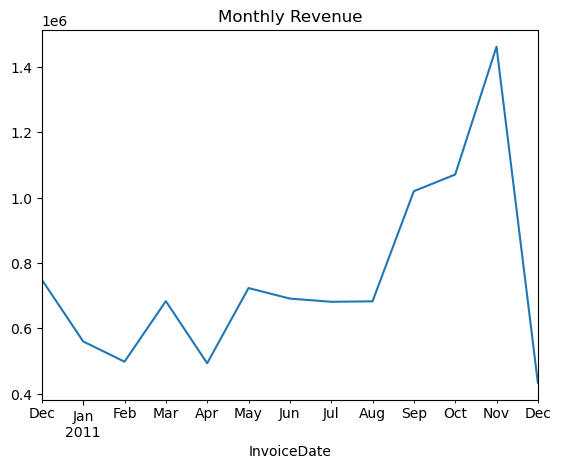

In [42]:
#Convert invoice date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

#Revenue over time
df.set_index('InvoiceDate')['TotalPrice'].resample('M').sum().plot()
plt.title("Monthly Revenue")

In [45]:
# As the InvoiceDate columns has already been Converted moving on.
# Reference Date ( last transaction date )
ref_date = df['InvoiceDate'].max()

# group by customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x: (ref_date - x.max()).days,
    'InvoiceNo' : 'nunique',
    'TotalPrice' : 'sum'
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

   CustomerID  Recency  Frequency  Monetary
0     12346.0      325          2      0.00
1     12347.0        1          7   4310.00
2     12348.0       74          4   1797.24
3     12349.0       18          1   1757.55
4     12350.0      309          1    334.40


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency','Frequency','Monetary']])

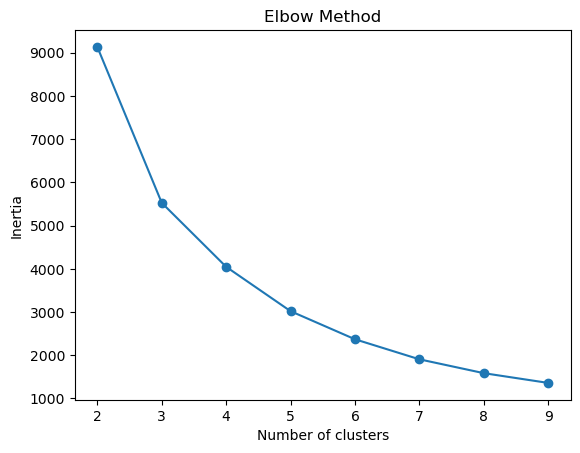

In [53]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)  # fix warning
    km.fit(rfm_scaled)
    inertia.append(km.inertia_)  # correct spelling

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [55]:
# Final Model 
kmeans = KMeans(n_clusters = 4, random_state = 42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

print(rfm.groupby('Cluster').mean())

           CustomerID     Recency  Frequency       Monetary
Cluster                                                    
0        15285.392237   40.606500   4.802461    1478.515539
1        15280.000000    6.666667  89.000000  182181.981667
2        15357.643054  246.951242   1.805888     453.488888
3        15139.500000    8.181818  40.672727   18441.961455


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


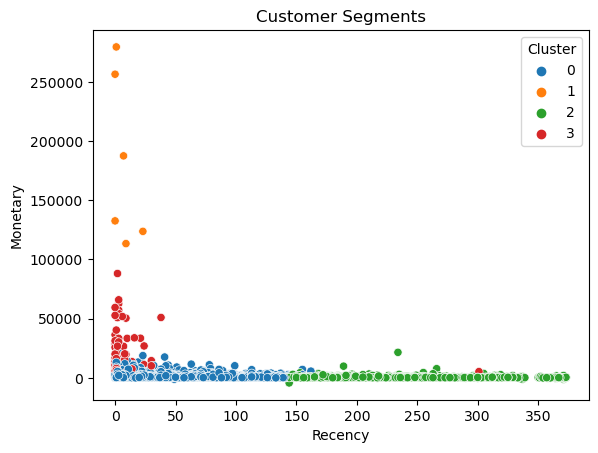

In [56]:
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='tab10')
plt.title("Customer Segments")
plt.show()


Business Use Case :
i. Cluster 0 (Loyal Customers): Offer premium membership, exclusive deals.
ii.Cluster 1 (Churn Risk): Send reactivation discounts.
iii.Cluster 2 (Potential Loyalists): Encourage with loyalty points.
iv.Cluster 3 (Lost Customers): Low priority, minimal marketing spend.

In [58]:
# To check the customers with their assigned clusters
print(rfm[['CustomerID','Recency','Frequency','Monetary','Cluster']])

      CustomerID  Recency  Frequency  Monetary  Cluster
0        12346.0      325          2      0.00        2
1        12347.0        1          7   4310.00        0
2        12348.0       74          4   1797.24        0
3        12349.0       18          1   1757.55        0
4        12350.0      309          1    334.40        2
...          ...      ...        ...       ...      ...
4367     18280.0      277          1    180.60        2
4368     18281.0      180          1     80.82        2
4369     18282.0        7          3    176.60        0
4370     18283.0        3         16   2094.88        0
4371     18287.0       42          3   1837.28        0

[4372 rows x 5 columns]
